# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

## Load verbs

In [125]:
import pandas as pd

from tqdm import tqdm

In [126]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [127]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [128]:
from allennlp.commands.elmo import ElmoEmbedder

In [129]:
elmo = ElmoEmbedder()

In [130]:
embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    embeddings.append(decontextualized)

100%|██████████| 105/105 [00:17<00:00,  6.30it/s]


In [131]:
df_verbs['embedding'] = embeddings

## Dimensionality reduce

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [134]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [135]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [136]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...",-0.078345,-2.310981
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.233744,2.999959
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...",-2.212974,0.462265
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...",-3.476051,0.026488
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...",-4.541062,2.265096


## Plot

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


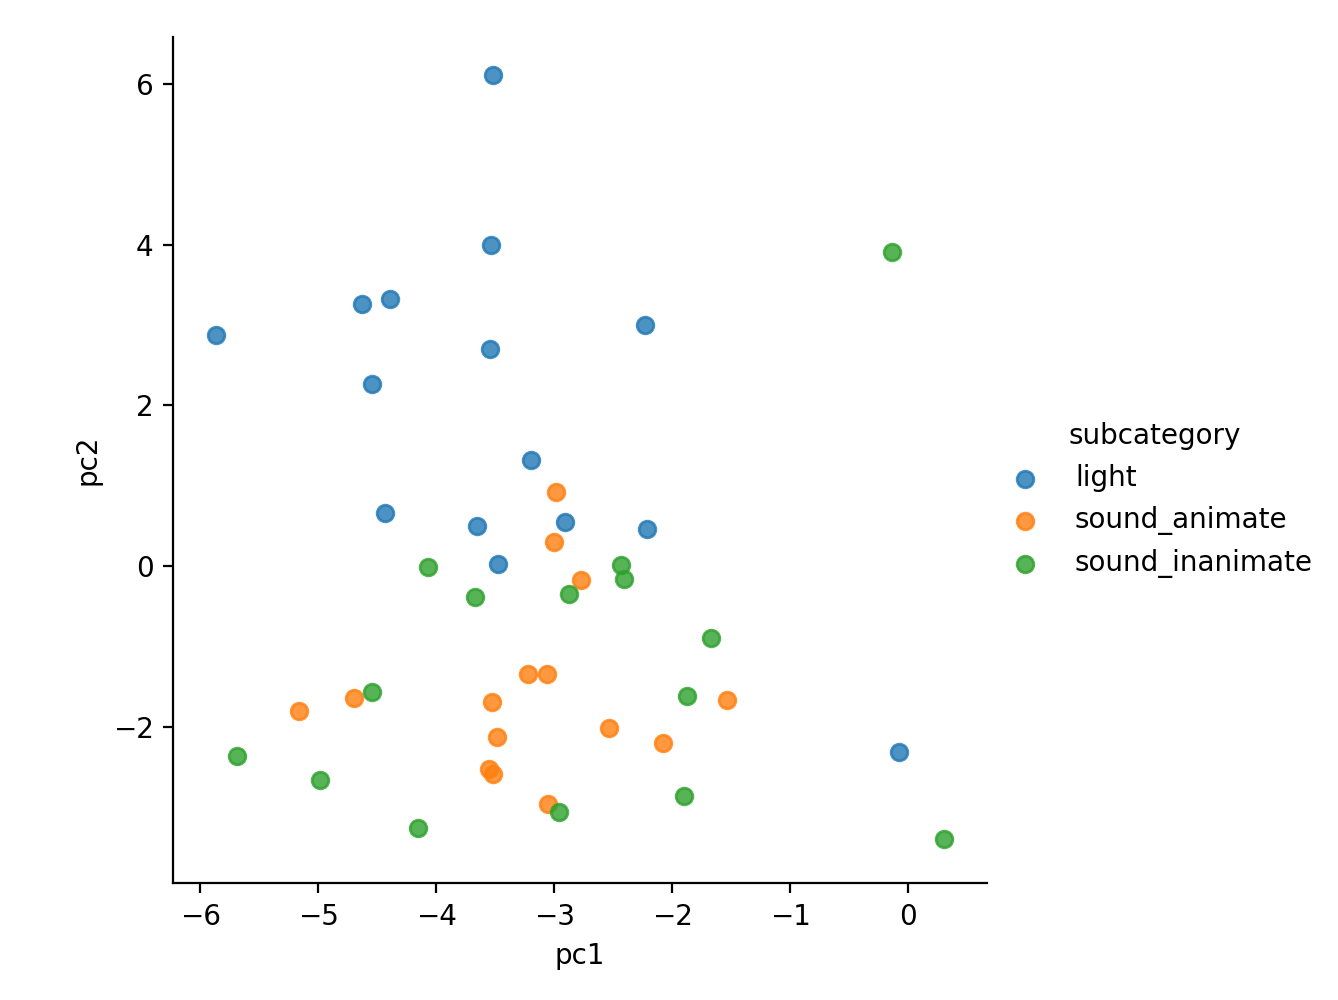

In [151]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory', 
           legend=True)

<IPython.core.display.Javascript object>


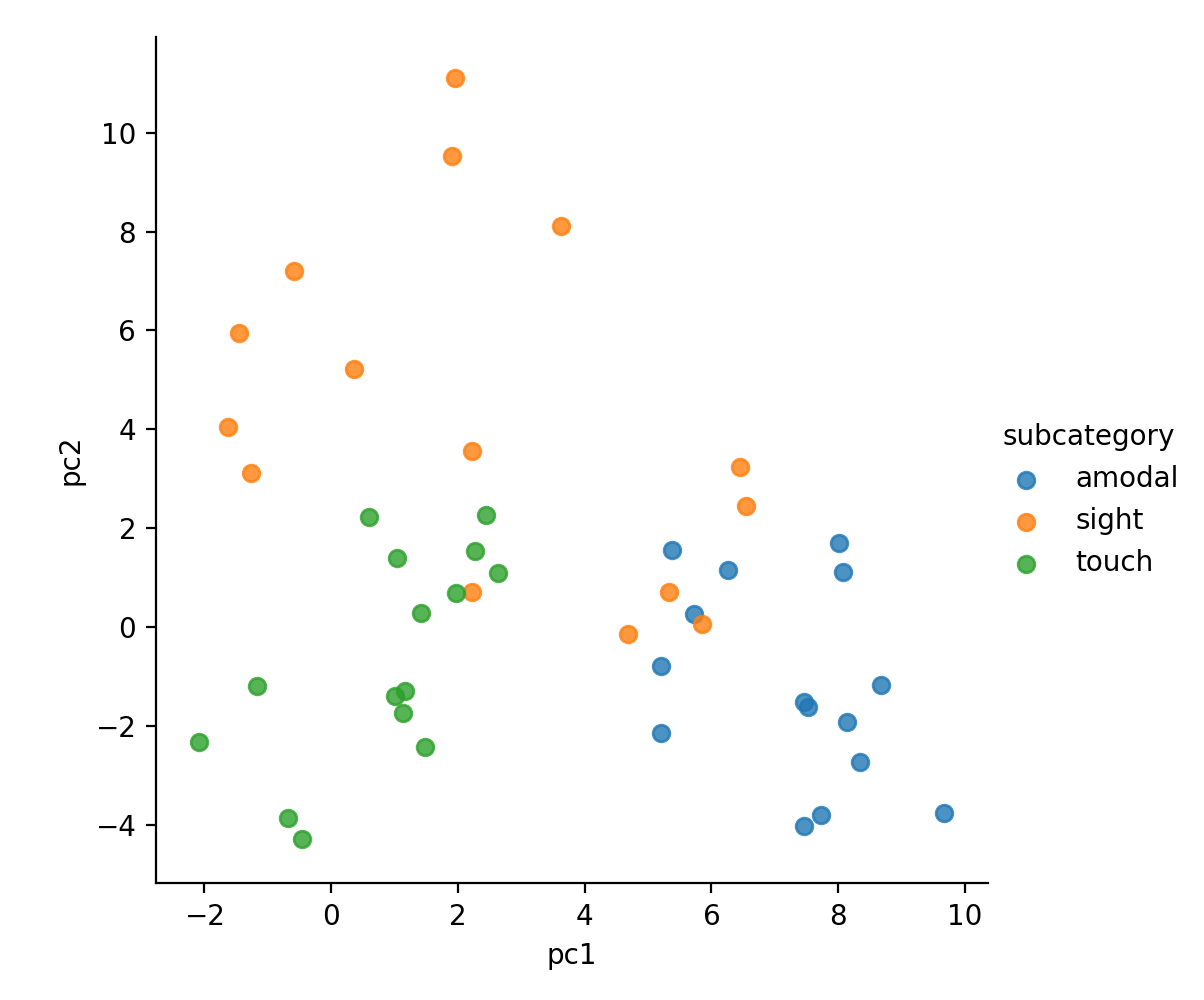

In [150]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

## Hierarchical clustering

### For sight perception

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [141]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [142]:
X = df_sighted[['pc1', 'pc2']].values

In [143]:
linked = linkage(X, 'ward')

In [144]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [25.625, 25.625, 101.875, 101.875]],
 'dcoord': [[0.0, 2.8537075150183826, 2.8537075150183826, 0.0],
  [0.0, 0.7903587502975561, 0.7903587502975561, 0.0],
  [0.0, 0.827196466889456, 0.827196466889456, 0.0],
  [0.0, 1.2078080307207868, 1.2078080307207868, 0.827196466889456],
  [0.7903587502975561,
   4.491565817239088,
   4.491565817239088,
   1.2078080307207868],
  [2.8537075150183826,
   6.178035114761261,
   6.178035114761261,
   4.491565817239088],
  [0.0, 1.5838408568241737, 1.5838408568241737, 0.0],
  [0.0, 3.2120191407006193, 3.2120191407006193, 1.5838408568241737],
  [0.0, 0.997668356083041

In [145]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")

## Get similarity scores

In [152]:
import itertools
import scipy
import ast

In [153]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [154]:
df_verbs['concat_test'] = df_verbs['embedding'].map(str) + "*" + df_verbs['verb']

In [155]:
analysis = []
for item1, item2 in tqdm(list(itertools.combinations(list(df_verbs['concat_test']), 2))):
    
    e1, e2 = ast.literal_eval(item1.split("*")[0]), ast.literal_eval(item2.split("*")[0])
    w1, w2 = item1.split("*")[1], item2.split("*")[1]

    # e1 = elmo.embed_sentence(w1)[0][0]
    # e2 = elmo.embed_sentence(w2)[0][0]
    
    embedding_distance = scipy.spatial.distance.cosine(e1, e2)
    
    analysis.append({
        'w1': w1,
        'w2': w2,
        'cosine_distance': embedding_distance
    })


100%|██████████| 5460/5460 [01:01<00:00, 88.69it/s] 


In [156]:
df_analysis = pd.DataFrame(analysis)
df_analysis.head(5)

,cosine_distance,w1,w2
0,0.900461,blaze,blink
1,0.780368,blaze,flare
2,0.929387,blaze,flash
3,0.865661,blaze,flicker
4,0.856313,blaze,gleam


In [157]:
df_analysis.to_csv("data/processed/verb_embedding_distances.csv")